# OBJECTIVE
- The purpose of this script is to analyze and find insights about the EMR Sightings dataset.

In [29]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime
#from sklearn.model_selection import train_test_split
import sklearn as sl
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",200)
emr_data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/EMR sightings dataset.csv')
emr_data


,id,rev,updated_date,system_updated_date,subject,tenant,submitted_date,locked_date,closed_date,eta,eta_request,sighting.open_date,sighting.root_caused_date,sighting.days_debugging,sighting.days_validating,sighting.days_debug_level1,sighting.days_debug_level2,sighting.forum_level_min,sighting.days_waiting,sighting.days_to_root_caused,parent_id,from_id,native,link_type,lineage,submitted_by,updated_by,owner,from_tenant,closed_by,sync_action,nickname,priority,relationship,relationship_action,context,release,classification,component,reason,sla_response_met,sla_resolution_met,family,send_mail,kinship,link_direction,from_subject,from_release,clone_status,status,domain,sighting.conclusion,sighting.env_found,sighting.fix_status,sighting.forum,sighting.status_mode,sighting.team_found,sighting.merge_id,sighting.forum_level,sighting.errata_status,sighting.fix_category,sighting.fix_category_2,sighting.fix_type,sighting.fix_status_2,sighting.fix_type_2,sighting.fix_lifetime_2,sighting.errata_info_owner,title,reason_other,status_reason,notify,tag,tenant_affected,hierarchy_path,permission_id_list,release_affected,subsystem,component_affected,sets,sighting.test_found,sighting.forum_visited,sighting_central.sighting.beat_owner,sighting_central.sighting.co_owners,sighting_central.sighting.date_open_new,sighting_central.sighting.days_open,sighting.days_open_aaron,sighting_central.sighting.debug_tools,sighting_central.sighting.hide_static_lu,sighting_central.sighting.root_cause_description,sighting_central.sighting.customer,sighting_central.sighting.date_rootcause_validate,sighting_central.sighting.failing_info,sighting_central.sighting.is_forum_lead,sighting_central.sighting.system_board,sighting_central.sighting.beat_status,sighting_central.sighting.customer_affected,sighting_central.sighting.os,sighting_central.sighting.sub_forum,sighting_central.sighting.date_assigned,sighting_central.sighting.days_new,sighting_central.sighting.days_lastupdate,sighting_central.sighting.beat_escape_reason,sighting_central.sighting.beat_required,sighting_central.sighting.gate_tag,sighting_central.sighting.platform_info,sighting_central.sighting.days_clone,sighting_central.sighting.total_days_new,sighting_central.sighting.beat_classification,sighting_central.sighting.beat_common_test_plan,sighting_central.sighting.beat_when_expected,sighting_central.sighting.beat_who_should_have_found,sighting_central.sighting.beat_detection_complexity,sighting_central.sighting.date_awaiting_review,sampletime,ww,ww_updated_date,ww_system_updated_date,ww_submitted_date,ww_closed_date,ww_eta,ww_eta_request,sighting.ww_open_date,sighting.ww_root_caused_date,sighting.ww_closed_aaron,sighting_central.sighting.ww_date_open_new,sighting_central.sighting.ww_date_rootcause_validate,sighting_central.sighting.ww_date_assigned,sighting_central.sighting.ww_date_awaiting_review,sighting_central.sighting.sysdbg_notes1,sighting_central.sighting.sysdbg_agenda,sighting_central.sighting.attention_needed,sighting_central.sighting.attention_reason,sighting_central.sighting.defect_history,sighting_central.sighting.defect_area,sighting_central.sighting.defect_source,sighting_central.sighting.sysdbg_tag1,sighting_central.sighting.bug_id,sighting_central.sighting.co_owner,sighting_central.sighting.from_component,sighting_central.sighting.supplying_ips,sighting_central.sighting.is_beat_approver,sighting_central.sighting.defect_die,family_affected,sighting_central.sighting.level_reason,sighting_central.sighting.level,sighting_central.sighting.vendor,sighting_central.sighting.port_configs,sighting_central.sighting.serial_io_interface,local_updated_date,sighting_central.sighting.customer_visible,sighting_central.sighting.impact,collaborators,sighting_central.sighting.beat_escape_reason_details,ww_local_updated_date
0,14018151333,23,19/12/2022 03:10,22/04/2024 21:28,sighting,sighting_central,6/12/2022 9:04,NaN,19/12/2022 03:09,NaN,NaN,6/12/2022 9:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1208771615,NaN,NaN,101553809

##  1. CLEANNING PROCESS/EXPLORATORY ANALYSIS


In [8]:
emr_data.columns

Index(['id', 'rev', 'updated_date', 'system_updated_date', 'subject', 'tenant',
       'submitted_date', 'locked_date', 'closed_date', 'eta',
       ...
       'sighting_central.sighting.level', 'sighting_central.sighting.vendor',
       'sighting_central.sighting.port_configs',
       'sighting_central.sighting.serial_io_interface', 'local_updated_date',
       'sighting_central.sighting.customer_visible',
       'sighting_central.sighting.impact', 'collaborators',
       'sighting_central.sighting.beat_escape_reason_details',
       'ww_local_updated_date'],
      dtype='object', length=154)

In [2]:
emr_data.isnull().sum()

id                                                        0
rev                                                       0
updated_date                                              0
system_updated_date                                       0
subject                                                   0
                                                       ... 
sighting_central.sighting.customer_visible              371
sighting_central.sighting.impact                        371
collaborators                                             0
sighting_central.sighting.beat_escape_reason_details    360
ww_local_updated_date                                     0
Length: 154, dtype: int64

In [30]:
emr_data1= emr_data[["id","updated_date","component","family","release","priority","title","status_reason","submitted_date","closed_date","owner","sighting.conclusion","sighting.team_found"]]
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,2-high,[EMR] EMR system Throttles due to External pr...,rejected.not_a_defect,6/12/2022 9:04,19/12/2022 03:09,adabney,hw.bug,ptp
1,14018509356,25/01/2023 00:47,NaN,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,3-medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected.filed_by_mistake,24/01/2023 17:26,25/01/2023 00:47,aebenavi,no_root_cause.rejected,arch
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,4-low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected.not_a_defect,29/03/2023 23:37,6/4/2023 20:38,ahinojos,not_a_bug,ev
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,4-low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected.not_a_defect,27/04/2023 16:40,26/05/2023 15:27,ahinojos,not_a_bug,ev
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp-xcc-a0,2-high,[EMR XCC ES2]Request sighting report for track...,rejected.merged,12/5/2023 9:09,12/5/2023 9:47,achu,no_root_cause.rejected,customer_support
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp-mcc-r1,3-medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete.wont_validate,1/11/2023 3:42,13/11/2023 22:07,wuweber,bios.bug,customer_support
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,2-high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused.awaiting_fix,22/11/2023 02:58,NaN,wenweita,fw.bug,customer_support
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,3-medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected.not_a_defect,6/12/2023 20:49,26/12/2023 15:05,thangama,not_a_bug,bu_platform
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp-xcc-a1,2-high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected.not_a_defect,7/12/2023 8:53,7/1/2024 21:11,wtian4,not_a_bug,customer_support


In [4]:
emr_data1.dtypes

id                      int64
updated_date           object
component              object
family                 object
release                object
priority               object
title                  object
status_reason          object
submitted_date         object
closed_date            object
owner                  object
sighting.conclusion    object
sighting.team_found    object
dtype: object

In [18]:
emr_data1.isnull().sum()

id                     0
updated_date           0
component              0
family                 0
release                0
priority               0
title                  0
status_reason          0
submitted_date         0
closed_date            0
owner                  0
sighting.conclusion    2
sighting.team_found    0
priority_num           0
submitted_year         0
days_between           0
title_tokens           0
frequent_words         0
processed              0
vector                 0
dtype: int64

In [13]:
emr_data['tenant'].value_counts()

tenant
sighting_central    372
Name: count, dtype: int64

In [4]:
emr_data['priority'].value_counts()

priority
3-medium         175
2-high           135
4-low             46
1-showstopper     16
Name: count, dtype: int64

In [35]:
emr_data['status_reason'].value_counts()

status_reason
rejected.not_a_defect        117
complete.validated           117
rejected.merged               34
rejected.wont_do              27
complete.wont_validate        20
complete                      17
rejected.filed_by_mistake     14
root_caused.pursuing_fix      10
rejected.cannot_reproduce      7
root_caused.awaiting_fix       7
open.clone                     2
Name: count, dtype: int64

In [4]:
emr_data1['owner'].value_counts().head(50)

owner
nljimene    13
ombecerr    11
csong20      9
coramire     9
bachavez     7
juanman1     7
jalonsoj     6
cadoming     6
bcalhoon     6
hmpicosm     5
sbarrios     5
srotich      5
prmarque     5
jgodoyde     5
jochoa       5
jsfernan     4
chinnai      4
gfuentes     4
jjabudtr     4
arnavarr     4
jaimeihe     4
jkalina      4
gomeseva     3
juanasol     3
lmalagon     3
joseitz      3
ipaezcas     3
eballest     3
jrdelsor     3
dfloress     3
ogalvezr     3
hkenya       3
cprivera     3
thangama     3
ovazquez     3
spullell     3
spashya      3
umeraban     2
jmachina     2
iherrer      2
taylorjo     2
jjbautis     2
gsotoram     2
vchalla      2
tolasupo     2
skaliraj     2
jorgecor     2
leiren       2
ivangele     2
kumarc       2
Name: count, dtype: int64

In [31]:
#### CLEANING FUNCTION

def tweak_hw(emr_data1):
    return (emr_data1
            
            .assign(status_reason=lambda df_: df_.status_reason.str.replace(".", "_"))
            .assign(release=lambda df_: df_.release.str.replace("-", "_"))
            .assign(priority=lambda df_: df_.priority.replace(
                {"1-showstopper": "showstopper", "2-high": "high", "3-medium": "medium", "4-low": "low"}
            )) 
            .assign(priority_num=lambda df_: df_.priority.map({
                "showstopper": 1, "high": 2, "medium": 3, "low": 4
            }))
            .assign(closed_date=lambda df_: pd.to_datetime(df_.closed_date, errors='coerce',dayfirst=True))
            .assign(closed_date=lambda df_: df_.closed_date.fillna(pd.Timestamp(datetime.today())))
            .assign(submitted_date=lambda df_: pd.to_datetime(df_.submitted_date, errors='coerce',dayfirst=True))
            .assign(submitted_year=lambda df_: df_.submitted_date.dt.year)
            .assign(days_between=lambda df_: (df_.closed_date - df_.submitted_date).dt.days)
            .assign(component=lambda df_: df_.component.fillna("NA"))
            .assign(submitted_year=lambda df_: df_.submitted_year.astype('int64'))
            .assign(days_between=lambda df_: df_.days_between.astype('int64'))
           )
           


In [32]:
emr_data1=tweak_hw(emr_data1)
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-28 16:47:10.547580,wenweita,fw.bug,customer_support,2,2023,341
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31


In [54]:
#emr_data1= emr_data1.fillna("NA")

In [5]:
emr_data1.dtypes

id                              int64
updated_date                   object
component                      object
family                         object
release                        object
priority                       object
title                          object
status_reason                  object
submitted_date         datetime64[ns]
closed_date            datetime64[ns]
owner                          object
sighting.conclusion            object
sighting.team_found            object
priority_num                    int64
submitted_year                  int64
days_between                    int64
dtype: object

In [6]:
emr_data1.isnull().sum()

id                     0
updated_date           0
component              0
family                 0
release                0
priority               0
title                  0
status_reason          0
submitted_date         0
closed_date            0
owner                  0
sighting.conclusion    2
sighting.team_found    0
priority_num           0
submitted_year         0
days_between           0
dtype: int64

In [6]:
emr_data1.sort_values("submitted_year")

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346
125,14017840950,13/05/2023 21:02,bios.mrc,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR A0 PO][EMR DDR EV] Lane dropping/ low mar...,complete_validated,2022-10-27 04:23:00,2023-01-05 17:39:00.000000,hkenya,hw.bug,ev,3,2022,70
124,14017766920,24/11/2022 15:06,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for FIVR DDR cause ...,complete_validated,2022-10-17 22:48:00,2022-11-24 15:06:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
123,14017766856,24/11/2022 15:04,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for SCFIO enables i...,complete_validated,2022-10-17 22:42:00,2022-11-24 15:04:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,16023465464,13/05/2024 15:23,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Cluster][FLEX EMR_XCC A1][Multiple] DISPATCHE...,root_caused_awaiting_fix,2024-03-04 11:41:00,2024-10-10 11:07:12.477414,appaji,fw.bug,bu_platform,2,2024,219
81,15015524089,24/06/2024 18:40,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,showstopper,[ByteDance][EMR][Yichun][Nettrix] Report CPU0 ...,root_caused_awaiting_fix,2024-02-27 01:29:00,2024-10-10 11:07:12.477414,cma16,hw.bug,customer_support,1,2024,226
80,22019353310,5/3/2024 17:54,hw.perf,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,EMR with Cassandra workload and Zstd compressi...,rejected_cannot_reproduce,2024-01-17 17:44:00,2024-03-05 17:54:00.000000,bravindr,no_root_cause.rejected,bu_platform,3,2024,48
345,15015657452,24/07/2024 21:55,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A0 ][XCC][2S][RAS] [Archer City] Unexpect...,rejected_not_a_defect,2024-03-18 04:25:00,2024-07-24 21:55:00.000000,staj,not_a_bug,bu_platform,3,2024,128


In [7]:
emr_data1['submitted_year'].value_counts()
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-10 11:07:12.477414,wenweita,fw.bug,customer_support,2,2023,323
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31


In [12]:
#### HOW MANY MAX DAYS BY PRIORITY, ID, and STATUS REASON

emr_data1[["priority","id","status_reason","days_between"]].groupby("priority").min()
emr_data1.sort_values("days_between",ascending=True).head(10)


,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00,srotich,no_root_cause.rejected,ptp,2,2023,-1
223,16020022626,14/03/2023 14:55,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][PCIe] MCE hit after rese...,rejected_not_a_defect,2023-03-13 12:14:00,2023-03-13 22:26:00,kumarc,not_a_bug,bu_platform,2,2023,0
173,15013780841,20/07/2023 13:29,NA,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,high,"EMR DSA DPDK dmadev_autotest failed with ""Data...",rejected_not_a_defect,2023-07-11 02:52:00,2023-07-11 22:39:00,gustavom,not_a_bug,customer_support,2,2023,0
315,14018467522,25/01/2023 01:05,hw.pma,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,[EMR-XCC][A0 VIS][Incoming DPM][PM] Units with...,rejected_filed_by_mistake,2023-01-19 18:15:00,2023-01-19 19:45:00,scerdasr,no_root_cause.rejected,mfg.ppv,1,2023,0
66,15013778573,10/7/2023 14:16,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[Cluster][EMR][XCC][A0][BKC13]MLC latency perf...,rejected_filed_by_mistake,2023-07-10 08:27:00,2023-07-10 14:13:00,bushengw,no_root_cause.rejected,bu_platform,3,2023,0
182,14020329138,12/9/2023 22:17,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][TME] Booting halts when TME,rejected_not_a_defect,2023-09-12 18:28:00,2023-09-12 22:17:00,jmorales,not_a_bug,sv,3,2023,0
166,16020779913,23/05/2023 18:57,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][UPI][XCC]: Observing CPU...,rejected_not_a_defect,2023-05-23 06:07:00,2023-05-23 18:57:00,johnsonl,not_a_bug,bu_platform,2,2023,0
152,14018662693,11/2/2023 4:06,hw.punit,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR] OOBMSM timeout (700ms) requires BMC to r...,rejected_wont_do,2023-02-11 03:58:00,2023-02-11 04:01:00,jcgindle,no_root_cause.rejected,customer_support,3,2023,0
73,22018704545,10/8/2023 19:36,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_f...,rejected_filed_by_mistake,2023-08-10 18:38:00,2023-08-10 19:36:00,coramire,no_root_cause.rejected,sv,3,2023,0


In [9]:
emr_data1.sort_values("closed_date",ascending=False).head(20)

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
306,14019800162,4/3/2024 22:09,hw.cxl,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][A1][CXL] reserved bits are set in H2D da...,root_caused_pursuing_fix,2023-07-06 23:46:00,2024-10-10 11:07:12.477414,prmarque,env.bug,sv,3,2023,461
188,14021433475,29/07/2024 17:43,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC MMX][mmx_32gb][A1] MemMatrix MRharass...,root_caused_pursuing_fix,2024-01-22 19:05:00,2024-10-10 11:07:12.477414,jgodoyde,fw.bug,sv,3,2024,261
187,15014854421,1/7/2024 6:22,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EGS EMR][Archer City][A1][2S][RAS] Patrol scr...,open_clone,2023-12-08 17:58:00,2024-10-10 11:07:12.477414,jli61,NaN,bu_platform,3,2023,306
183,14020397220,6/3/2024 16:50,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,root_caused_awaiting_fix,2023-09-20 20:13:00,2024-10-10 11:07:12.477414,jochoa,fw.bug,sv.cluster,3,2023,385
237,14021187328,7/3/2024 17:11,fw.ucode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][Cafe OSPL] Acode/Ucode GPSB TO to OOB...,root_caused_pursuing_fix,2023-12-14 22:22:00,2024-10-10 11:07:12.477414,jtgilmer,fw.bug,sv.core,3,2023,300
238,15015216561,3/5/2024 14:26,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[ByteDance][EMR[Perf] ffmpeg low performance i...,root_caused_awaiting_fix,2024-01-24 09:20:00,2024-10-10 11:07:12.477414,leiren,fw.bug,customer_support,2,2024,260
171,14019660995,13/02/2024 14:39,hw.cxl,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,medium,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,root_caused_awaiting_fix,2023-06-16 18:06:00,2024-10-10 11:07:12.477414,jclopezg,hw.bug,sv,3,2023,481
240,22019713637,18/07/2024 23:56,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR XCC A1]SAF scan can sometimes report scan...,root_caused_pursuing_fix,2024-03-26 18:41:00,2024-10-10 11:07:12.477414,lbphan,fw.bug,bu_platform,3,2024,197
241,15015930498,17/06/2024 16:25,hw.pcie5,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver v2][EMR]128k Seq Write doesn't meet ...,root_caused_pursuing_fix,2024-04-23 10:56:00,2024-10-10 11:07:12.477414,leiren,hw.bug,customer_support,2,2024,170
120,14021867778,15/07/2024 17:51,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,Acode PMA registers are missing from crashlog ...,root_caused_pursuing_fix,2024-03-06 21:46:00,2024-10-10 11:07:12.477414,gilbert,fw.arch,fw.eval,2,2024,217


In [9]:
emr_data1[["component"]].value_counts()
#db=emr_data1["component"]=="NA"
#emr_data1.loc[db]

component            
hw.memory                62
NA                       28
bios.mrc                 25
hw.fuse                  24
hw.perf                  21
fw.acode                 21
fw.pcode                 17
hw.pcie5                 15
hw.cha                   12
fw.ucode                 12
val.env.tool             11
val.env.configuration    10
hw.cxl                   10
hw.big_core               9
bios                      9
hw.upi                    8
fw.ltm                    7
fw.other                  6
hw.mesh                   5
val.env.test              5
hw.ras                    4
fw.ucode.patch            4
hw.m2iosf                 4
hw.reset                  3
hw.punit                  3
fw.mcheck                 3
sw.application            2
hw.configrom              2
val.env.debug_tools       2
fw.cpm                    2
hw.pma                    2
hw.power                  2
hw.virtualization         1
val.env.content           1
hw.uncore                 

In [10]:
#### CLOSE_DATE2 IS DATETIME
#### SUBMITTED_DATE2 IS DATETIME
#### YEAR_SUBMITTED IS INT64
#### DAYS_BETWEEN IS INT64
#### PRIORITY_NUM IS INT64

emr_data1.dtypes

id                              int64
updated_date                   object
component                      object
family                         object
release                        object
priority                       object
title                          object
status_reason                  object
submitted_date         datetime64[ns]
closed_date            datetime64[ns]
owner                          object
sighting.conclusion            object
sighting.team_found            object
priority_num                    int64
submitted_year                  int64
days_between                    int64
dtype: object

In [45]:
emr_data1.isnull().sum()

id                      0
updated_date            0
component              28
family                  0
release                 0
priority                0
title                   0
status_reason           0
submitted_date          0
closed_date            19
owner                   0
sighting.conclusion     2
sighting.team_found     0
priority_num            0
submitted_year          0
days_between           19
dtype: int64

In [20]:
#### WE CAN CONFIRM THAT THE MAXIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE 361.
#### WE CAN CONFIRM THAT THE MINIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE -1.

emr_data1.describe()

,id,submitted_date,closed_date,priority_num,submitted_year,days_between
count,3.720000e+02,372,372,372.000000,372.000000,372.000000
mean,1.498100e+10,2023-04-21 22:56:32.419354880,2023-07-16 12:25:01.069824,2.674731,2022.862903,85.016129
min,1.401763e+10,2022-09-21 16:18:00,2022-10-18 21:11:00,1.000000,2022.000000,-1.000000
25%,1.401855e+10,2023-01-23 05:54:00,2023-03-15 23:56:00,2.000000,2023.000000,13.000000
50%,1.401928e+10,2023-03-24 17:01:00,2023-06-28 21:49:30,3.000000,2023.000000,35.500000
75%,1.402184e+10,2023-06-22 23:36:45,2023-10-10 20:04:15,3.000000,2023.000000,119.750000
max,2.202018e+10,2024-07-04 06:17:00,2024-10-15 16:10:46.209186,4.000000,2024.000000,486.000000
std,2.313178e+09,NaN,NaN,0.744508,0.492554,103.801229


In [11]:

#### "rejected_filed_by_mistake" ROWS

#sr=emr_new["status_reason2"]=="rejected_filed_by_mistake"
#emr_new.loc[sr]


emr_data1["status_reason"].value_counts()[emr_data1['status_reason'].value_counts()==emr_data1['status_reason'].value_counts()]

status_reason
rejected_not_a_defect        117
complete_validated           117
rejected_merged               34
rejected_wont_do              27
complete_wont_validate        20
complete                      17
rejected_filed_by_mistake     14
root_caused_pursuing_fix      10
rejected_cannot_reproduce      7
root_caused_awaiting_fix       7
open_clone                     2
Name: count, dtype: int64

In [21]:
#### "-1" ROWS

db=emr_data1["days_between"]==-1
emr_data1.loc[db]

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00,srotich,no_root_cause.rejected,ptp,2,2023,-1


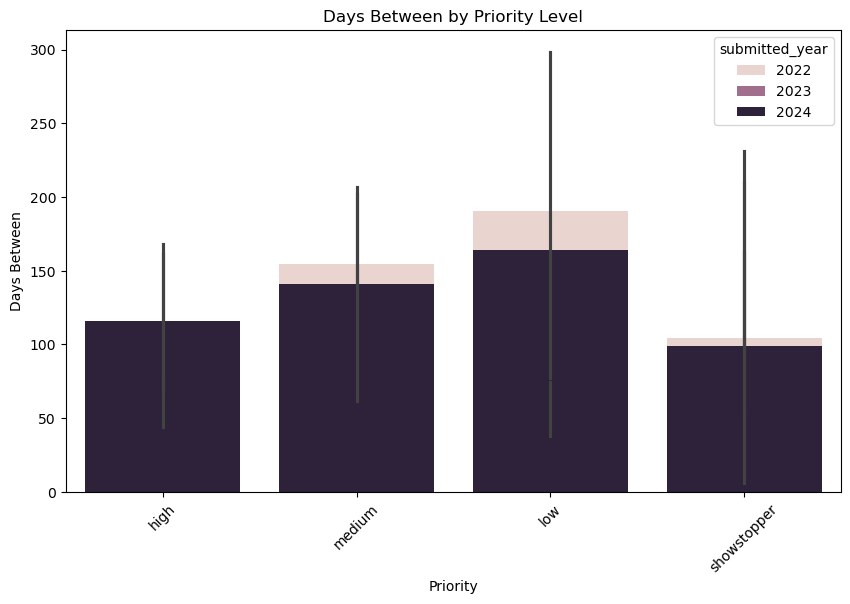

In [22]:
#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=emr_data1, x='priority', y='days_between', hue='submitted_year', dodge=False)
plt.title('Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'days_between'
Q1 = emr_data1['days_between'].quantile(0.25)
Q3 = emr_data1['days_between'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter to get outliers (values below the lower bound or above the upper bound)
outliers = emr_data1[(emr_data1['days_between'] < lower_bound) | (emr_data1['days_between'] > upper_bound)]


outliers_table = outliers[['title','priority','days_between','submitted_year']]
outliers_table.sort_values(by='days_between', ascending=False)



,title,priority,days_between,submitted_year
171,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,medium,499,2023
306,[EMR][A1][CXL] reserved bits are set in H2D da...,medium,479,2023
183,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,medium,403,2023
310,[Cluster][XCC A1][MCA_WATCHDOG_TIMEOUT_BULK_CR...,medium,363,2023
86,[EMR XCC] Prod POF enablement: S3M is not resp...,high,361,2022
77,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,medium,356,2023
198,[EMR-PO][A0][RAS]: CHA mc_status & UBOX mc_mis...,medium,354,2022
88,EMR PO: Errata update - MSR for DDIO Mask won...,low,354,2022
126,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,medium,346,2022
368,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,high,341,2023


In [34]:
print(IQR) ### it's used to identify the spread of the central portion of the data,captures the middle 50%.
print(lower_bound) 
print(upper_bound) ### Any data points with values above this threshold are considered outliers.

106.75
-147.125
279.875


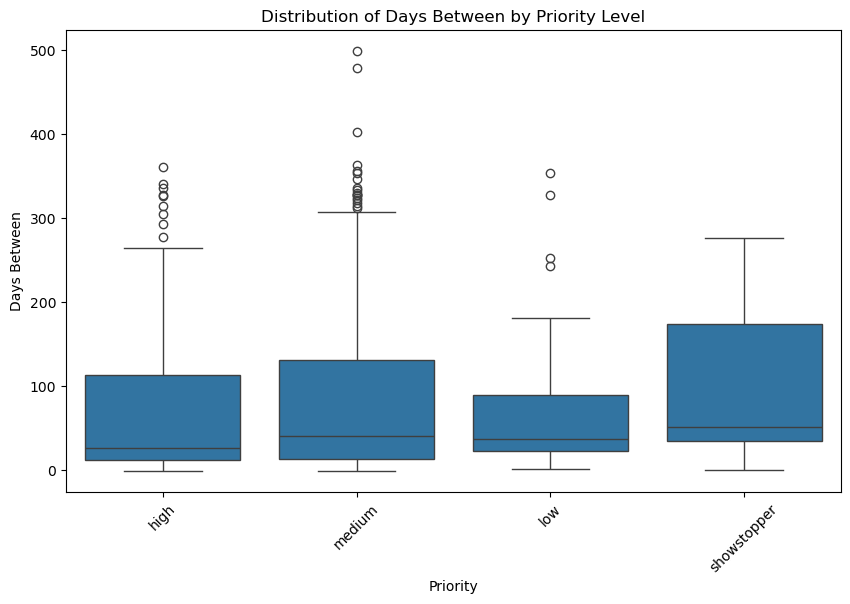

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=emr_data1, x='priority', y='days_between')
plt.title('Distribution of Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [10]:
fd=emr_data1[emr_data1['days_between'] <= 279.875]
fd

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00,adabney,hw.bug,ptp,2,2022,12
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00,aebenavi,no_root_cause.rejected,arch,3,2023,0
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00,ahinojos,not_a_bug,ev,4,2023,7
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00,ahinojos,not_a_bug,ev,4,2023,28
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00,achu,no_root_cause.rejected,customer_support,2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,15014540277,24/10/2023 19:43,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[PAIV_PLAT_PNP][EMR] SIR GCC loadline linearit...,rejected_not_a_defect,2023-10-23 08:35:00,2023-10-24 19:43:00,xzhou50,not_a_bug,bu_platform,3,2023,1
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00,wuweber,bios.bug,customer_support,3,2023,12
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00,thangama,not_a_bug,bu_platform,3,2023,19
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00,wtian4,not_a_bug,customer_support,2,2023,31


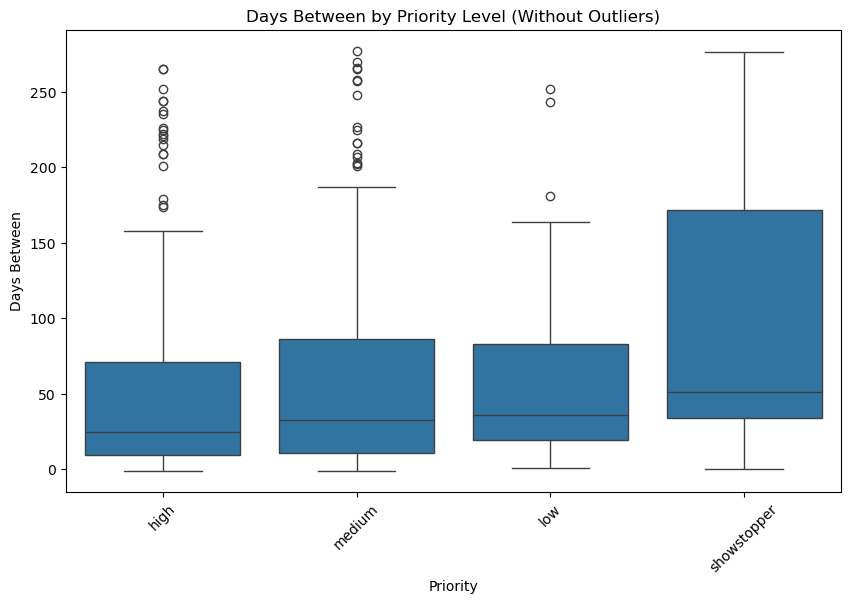

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fd, x='priority', y='days_between')
plt.title('Days Between by Priority Level (Without Outliers)')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [15]:
#### QTY BY DAYS AND PRIORITY (TOTAL=353)

emr_data1[["days_between","priority"]].groupby("priority").count()

,days_between
priority,
high,129
low,46
medium,163
showstopper,15


In [6]:

#### QTY BY YEAR, PRIORITY (TOTAL=372)

emr_data1.groupby(["submitted_year"])["priority"].value_counts()


submitted_year  priority   
2022            high            30
                medium          30
                showstopper      9
                low              5
2023            medium         137
                high            94
                low             40
                showstopper      4
2024            high            11
                medium           8
                showstopper      3
                low              1
Name: count, dtype: int64

In [12]:
emr_data1.groupby(["submitted_year"])["status_reason"].value_counts()


submitted_year  status_reason            
2022            complete_validated           46
                rejected_not_a_defect        14
                complete                      4
                rejected_merged               4
                complete_wont_validate        3
                rejected_filed_by_mistake     2
                rejected_wont_do              1
2023            rejected_not_a_defect        98
                complete_validated           68
                rejected_merged              29
                rejected_wont_do             24
                complete_wont_validate       17
                complete                     13
                rejected_filed_by_mistake    12
                rejected_cannot_reproduce     5
                root_caused_awaiting_fix      4
                root_caused_pursuing_fix      4
                open_clone                    1
2024            root_caused_pursuing_fix      6
                rejected_not_a_defect         

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def process_by_word_frequency(emr_data1):
    # Set of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize titles and remove stopwords
    emr_data1['title_tokens'] = emr_data1['title'].apply(lambda title: [
        word for word in word_tokenize(title.lower()) if word.isalnum() and word not in stop_words
    ])
    
    # Flatten the list of all words in the 'title' column to compute frequencies
    all_words = [word for tokens in emr_data1['title_tokens'] for word in tokens]
    
    # Compute word frequency distribution
    freq_dist = FreqDist(all_words)
    
    # Assign the most frequent words in each title to a new column
    emr_data1['frequent_words'] = emr_data1['title_tokens'].apply(lambda tokens: [
        word for word in tokens if freq_dist[word] > 1  # Threshold of 1, you can adjust
    ])
    
    return emr_data1

# Apply the function to your dataset
emr_data1 = process_by_word_frequency(emr_data1)

# Show the results
emr_nlp=emr_data1[['title', 'frequent_words']].head(20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
emr_nlp

,title,frequent_words
0,[EMR] EMR system Throttles due to External pr...,"[emr, emr, system, due, external, 2, sockets]"
1,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,"[cxl, 2s, bios, needs, change, mode, all2all]"
2,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,"[xpv, ave, emr, xcc, a0, upi, gen5, siv, rx, j..."
3,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,"[xpv, ave, emr, xcc, a0, upi, gen5, siv, rx, j..."
4,[EMR XCC ES2]Request sighting report for track...,"[emr, xcc, es2, request, report, pirom, size, ..."
5,[EMR XCC ES2]PIROM size display issue on EMR E...,"[emr, xcc, es2, pirom, size, display, issue, e..."
6,[EMR] Host CA Training Complex Training Failu...,"[emr, host, ca, training, complex, training, f..."
7,[EMR] High TX DFE TAP Variability across multi...,"[emr, high, tx, dfe, variability, across, mult..."
8,[EMR][A1][PNP]Core Freq in powersave mode runn...,"[emr, a1, core, freq, powersave, mode, running..."
9,[EMR] Active Idle Mode violates MAX_RATIO from...,"[emr, active, idle, mode, violates, msr]"


In [38]:
emr_nlp['title'].sort_values()

14    EMR PO: Core and LLC slice masks are different...
11    EMR-XCC: FIVR Ouput voltage saturates at highe...
15               MDF Partify failure on  instance mdfv4
12      PI5 pcode_sa fuse disable incorrectly programed
16    [EMR A0][PO][Coherency] IDI_Stress with TOR an...
5     [EMR XCC ES2]PIROM size display issue on EMR E...
4     [EMR XCC ES2]Request sighting report for track...
10    [EMR XCC] S3M Fuse Offload failing due to mism...
18    [EMR XCC] Wrong Turbo Bin bucket 7 impacting P...
17    [EMR XCC] Wrong mapping on SST-TF mailbox for ...
19    [EMR XCC] wrong pcode_config_tdp_level_en_mask...
1     [EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...
6     [EMR]  Host CA Training Complex Training Failu...
9     [EMR] Active Idle Mode violates MAX_RATIO from...
0     [EMR] EMR system  Throttles due to External pr...
7     [EMR] High TX DFE TAP Variability across multi...
8     [EMR][A1][PNP]Core Freq in powersave mode runn...
3     [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx J

In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Procesar cada texto en la columna del DataFrame
emr_data1['processed'] = emr_data1['title'].apply(lambda x: nlp(x))
print(emr_data1['processed'])

0      ([, EMR, ], EMR, system,  , Throttles, due, to...
1      ([, EMR, -, CXL1.1][CXL][2S, ], BIOS, needs, t...
2      ([, XPV, AVE, ], [, EMR, XCC, A0, ], [, UPI, G...
3      ([, XPV, AVE, ], [, EMR, XCC, A0, ], [, UPI, G...
4      ([, EMR, XCC, ES2]Request, sighting, report, f...
                             ...                        
367    ([, Lenovo, -, TDC\Seoul, ], Wrong, PIROM, con...
368    ([, Bytedance][Yichun][Nettrix, ], NVMe, PCIe,...
369    ([, EMR, A1][2S][PMSS][SST, ], :, CLOS, 0, and...
370    ([, TriRiver, V2][EMR]CPU, has, thermal, hot, ...
371    ([, EMR, ], [, Mixed, Rank, ], Enhanced, warni...
Name: processed, Length: 372, dtype: object


In [40]:
# Extraer vectores
emr_data1['vector'] = emr_data1['processed'].apply(lambda doc: doc.vector)
print(emr_data1['vector'])

0      [-0.17196515, -0.24512874, -0.08515345, -0.173...
1      [-0.31234646, -0.48467824, 0.382789, -0.018293...
2      [-0.229935, -0.21269326, 0.016304022, -0.05596...
3      [-0.38596106, -0.23627582, -0.039272692, -0.03...
4      [-0.37674883, -0.5054178, 0.012643905, -0.3083...
                             ...                        
367    [-0.43781424, -0.23527496, 0.24542637, -0.0166...
368    [0.05693891, -0.056357305, 0.32922804, -0.0646...
369    [-0.14644209, -0.34898213, 0.23131551, 0.06788...
370    [-0.19942236, -0.2749697, 0.02580991, 0.047599...
371    [-0.1796777, -0.16336852, 0.16480857, -0.32182...
Name: vector, Length: 372, dtype: object


In [41]:
# Verificar la forma de los vectores
print(emr_data1['vector'].apply(lambda x: x.shape))

0      (96,)
1      (96,)
2      (96,)
3      (96,)
4      (96,)
       ...  
367    (96,)
368    (96,)
369    (96,)
370    (96,)
371    (96,)
Name: vector, Length: 372, dtype: object


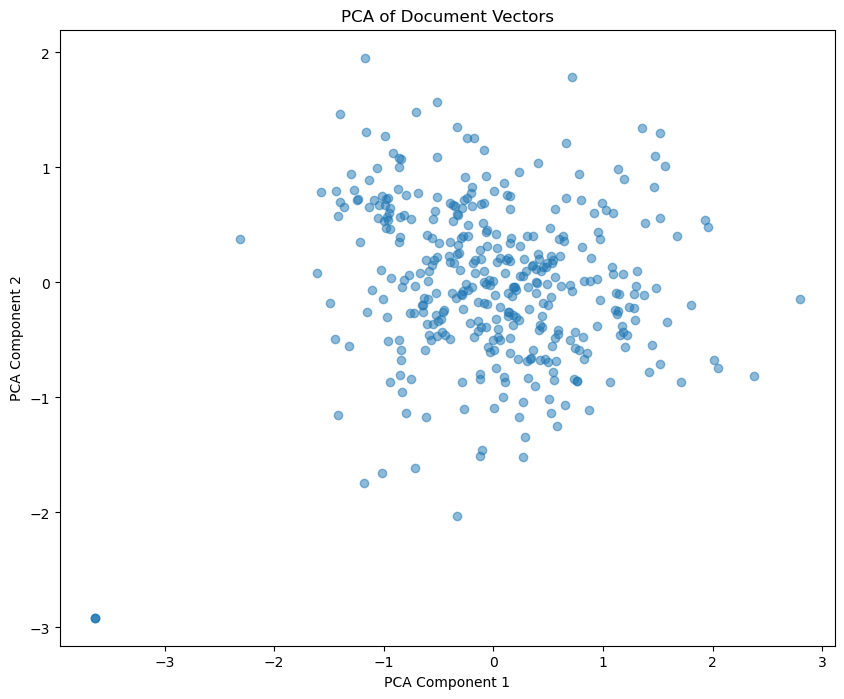

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(emr_data1['vector'].tolist())

# Plot the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)
plt.title('PCA of Document Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


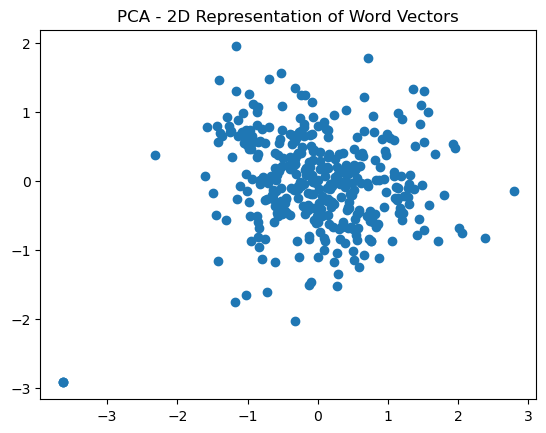

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(emr_data1['vector'].tolist())

# Plot the 2D vectors
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title('PCA - 2D Representation of Word Vectors')
plt.show()


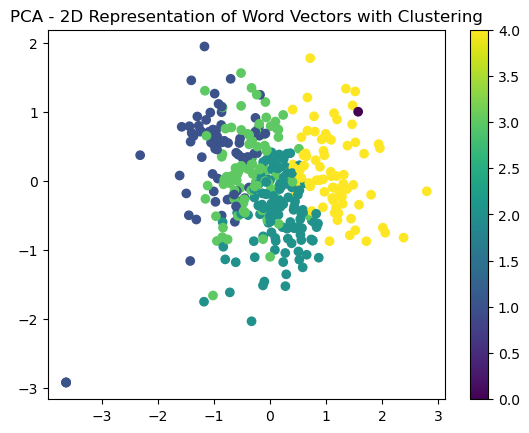

In [56]:
# Assuming you have cluster or label data in 'emr_data1['cluster']'
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=emr_data1['cluster'], cmap='viridis')
plt.colorbar()
plt.title('PCA - 2D Representation of Word Vectors with Clustering')
plt.show()


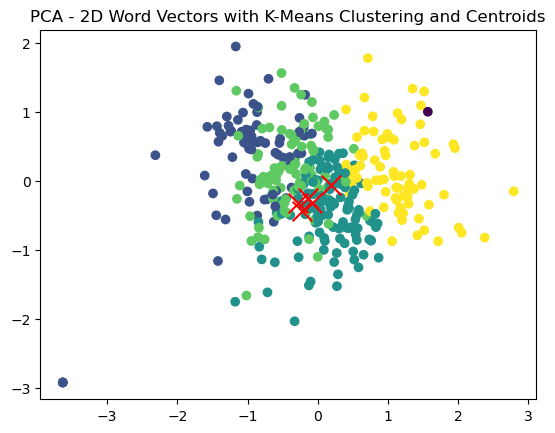

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
emr_data1['cluster'] = kmeans.fit_predict(emr_data1['vector'].tolist())
centers = kmeans.cluster_centers_

# Plot clusters with centroids
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=emr_data1['cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('PCA - 2D Word Vectors with K-Means Clustering and Centroids')
plt.show()


In [55]:
# Calculate the mean of PCA_Component_1 and PCA_Component_2
centroid_pca1 = pca_df['PCA_Component_1'].mean()
centroid_pca2 = pca_df['PCA_Component_2'].mean()

print(f"Centroid of PCA Component 1: {centroid_pca1}")
print(f"Centroid of PCA Component 2: {centroid_pca2}")


Centroid of PCA Component 1: 2.3875763970433476e-18
Centroid of PCA Component 2: 4.2379481047519416e-17


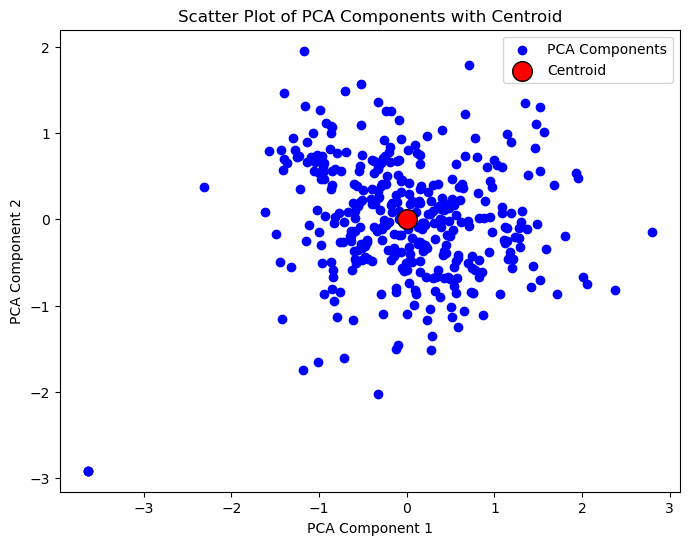

In [45]:
import matplotlib.pyplot as plt

# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue', label='PCA Components')

# Plot the centroid
plt.scatter(centroid_pca1, centroid_pca2, color='red', label='Centroid', s=200, edgecolor='black')

# Adding labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components with Centroid')
plt.legend()

plt.show()


In [52]:
import pandas as pd

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    'Index': emr_data1.index,
    'Processed_Text': emr_data1['title'],  # or use original text column
    'PCA_Component_1': vectors_2d[:, 0],
    'PCA_Component_2': vectors_2d[:, 1]
})

# Display the first few rows of the table
print(pca_df.head())


   Index                                     Processed_Text  PCA_Component_1  \
0      0  [EMR] EMR system  Throttles due to External pr...        -0.254233   
1      1  [EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...         0.556642   
2      2  [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...        -0.956755   
3      3  [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...        -1.138123   
4      4  [EMR XCC ES2]Request sighting report for track...        -0.108876   

   PCA_Component_2  
0        -0.009747  
1        -0.851122  
2         0.602113  
3         0.890451  
4         0.203162  


In [53]:
# Calculate min and max for PCA Component 1
pca1_min = pca_df['PCA_Component_1'].min()
pca1_max = pca_df['PCA_Component_1'].max()

# Calculate min and max for PCA Component 2
pca2_min = pca_df['PCA_Component_2'].min()
pca2_max = pca_df['PCA_Component_2'].max()

# Display the results
print("PCA Component 1 - Min:", pca1_min, "Max:", pca1_max)
print("PCA Component 2 - Min:", pca2_min, "Max:", pca2_max)


PCA Component 1 - Min: -3.633930318703231 Max: 2.792239354031074
PCA Component 2 - Min: -2.915476317970021 Max: 1.9544778791158715


In [54]:
pca_df[pca_df["PCA_Component_1"] ==-3.63393031870323 ]["Processed_Text"].values[0]

'[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0'

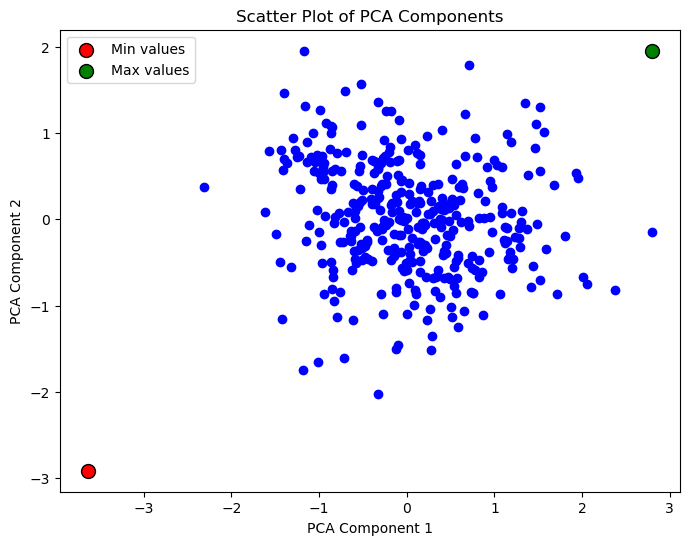

In [41]:
# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue')

# Highlight the min and max points
plt.scatter(pca1_min, pca2_min, color='red', label='Min values', s=100, edgecolor='black')
plt.scatter(pca1_max, pca2_max, color='green', label='Max values', s=100, edgecolor='black')

# Adding labels
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components')
plt.legend()

plt.show()


In [67]:
import numpy as np

# Centroids (assuming you've already calculated them)
centroid_pca1 = pca_df['PCA_Component_1'].mean()
centroid_pca2 = pca_df['PCA_Component_2'].mean()

# Function to calculate the Euclidean distance from the centroids
def calculate_distance(row):
    return np.sqrt((row['PCA_Component_1'] - centroid_pca1)**2 + (row['PCA_Component_2'] - centroid_pca2)**2)

# Apply the function to each row in the DataFrame to calculate the distance to the centroid
pca_df['Distance_to_Centroid'] = pca_df.apply(calculate_distance, axis=1)

# Find the row with the minimum distance to the centroid (closest to the centroid)
closest_to_centroid = pca_df.loc[pca_df['Distance_to_Centroid'].idxmin()]

# Get the index of the closest title and retrieve the title from emr_data1
index_value = closest_to_centroid.name
title_closest_to_centroid = emr_data1.loc[index_value, 'title']

# Extract the PCA values for the closest point
closest_pca1 = closest_to_centroid['PCA_Component_1']
closest_pca2 = closest_to_centroid['PCA_Component_2']

print(f"The title closest to the centroid is: {title_closest_to_centroid}")
print(f"The PCA values for this title are: PCA_Component_1 = {closest_pca1}, PCA_Component_2 = {closest_pca2}")



The title closest to the centroid is: [ECC TF][Micron Bucket 1] RE32 fails at 5200 with UCECC
The PCA values for this title are: PCA_Component_1 = -0.001144058497944465, PCA_Component_2 = 0.016128334253113732


In [19]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
emr_data1['cluster'] = kmeans.fit_predict(emr_data1['vector'].tolist())

# Display the cluster assignment with the title
print(emr_data1[['title', 'cluster']].head())


                                               title  cluster
0  [EMR] EMR system  Throttles due to External pr...        2
1  [EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...        4
2  [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...        3
3  [XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...        3
4  [EMR XCC ES2]Request sighting report for track...        3


In [23]:
# Display titles in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    cluster_titles = emr_data1[emr_data1['cluster'] == cluster_num]['title'].values
    for title in cluster_titles:
        print(f" - {title}")
    print("\n")


Cluster 0:
 - [EMR XCC ES2]PIROM size display issue on EMR ES2 XCC/MCC (A0/R0).
 - [EMR-XCC][Perf-IO][EMR-A0] PCIe Gen.5 2S Concurrency Remote 3x16 RDWR512 + MLC W6 causes hang MCE
 - PCIe RMAs in EMR: [EMR A0 CI BIOS ]<<Update BIOS name - 98_D34_EGSDCRB.SYS.OR.64.2023.05.3.02.2031.0_EMR_EBG_SPS_VVmods.bin>>
 - [HVCP][EMR-A0][PreSighting] Failure for DH84-PPVIsaOn-0Sanity-CST-0310005C @ IA P1 corner for QDF Q2P3
 - [EMR-MCC][Perf-IO][EMR-R0] PCIe Gen.5 2S Single Port Remote RD RDWR partial payload 8b performance drop ~40% in UFS HEMI
 - [EGS-EMR-XCC] 24Gb idle memory latency is higher than 16Gb Idle memory Latency
 - [EMR][A1][Concurrency][SAE21] 3-Strike and TOR_TIMEOUT on Locks
 - [EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0
 - [EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0
 - [EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(emr_data1['vector'].tolist(), emr_data1['days_between'], test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
print("Model accuracy: ", clf.score(X_test, y_test))


Model accuracy:  0.0625


In [14]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", reg.score(X_test, y_test))


Model R^2 score:  -0.7886431217193604


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", rf.score(X_test, y_test))


Model R^2 score:  -0.0420700744608864


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between vectors
similarity_matrix = cosine_similarity(emr_data1['vector'].tolist())

# Display similarity matrix
print(similarity_matrix)


[[0.9999999  0.48714408 0.6706345  ... 0.60565263 0.5236038  0.6578199 ]
 [0.48714408 0.9999999  0.5594558  ... 0.67530334 0.51681894 0.5264227 ]
 [0.6706345  0.5594558  0.9999998  ... 0.7378689  0.5968982  0.7253362 ]
 ...
 [0.60565263 0.67530334 0.7378689  ... 1.0000002  0.5153497  0.63437253]
 [0.5236038  0.51681894 0.5968982  ... 0.5153497  0.99999994 0.6416299 ]
 [0.6578199  0.5264227  0.7253362  ... 0.63437253 0.6416299  1.        ]]


In [37]:
emr_data1[emr_data1["days_between"] == 0]["title"].values[0]

'[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen'

In [38]:
emr_data1[emr_data1["days_between"] == 0]["title"].values

array(['[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen',
       '[EMR XCC ES2]Request sighting report for tracking about the PIROM size display issue on EMR ES2 XCC/MCC (A0/R0).',
       '[EMR] Active Idle Mode violates MAX_RATIO from MSR 0x620',
       '[EMR_A0] PCU/Acode MCAs during OSPL and Cafe Ucode_update recipe',
       '[Cluster][EMR][XCC][A0][BKC13]MLC latency performance drop ~11.9% in BKC13 compare to BKC11',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR A0][PO][Coherency][CXL] SUT hang on GM03WVAW2736 when executing Lock Stress + CXL',
       '[EMR MCC PO] 3DS 4Rx4 (2Hi) 1DPC test fails JedecIt check. Violation of -1',
       '[EMR] [RAS] Parity Errors Reported After SUT reset when Viral Alert enabled in Bios Menu (surprise warm reset after viral/

In [39]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

In [46]:
sns.countplot(data=emr_data1, x='priority_num')
plt.title('Real or Not Real Disaster Tweet')

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.